# **Trabajo 3: Estadística y Análisis Exploratorio**

**Integrantes:**
- Andrés Camilo Henao Serna.
- Anderson Fabian Blanco.
- Isabel Cristina Suárez Roldán.

En un estudio a gran escala realizado en EE.UU sobre la eficacia en el control de infecciones hospitalarias se recogió
información en 113 hospitales. A su equipo de trabajo le corresponde analizar una muestra aleatoria de n hospitales,
que están dentro de un archivo de texto adjunto, donde n es el número de registros en el archivo asignado y X es el
número de equipo asignado. La base de datos contiene las siguientes columnas (variables):

Y: Riesgo de infección - Probabilidad promedio estimada de adquirir infección en el hospital (en porcentaje).

X1: Duración de la estadía - Duración promedio de la estadía de todos los pacientes en el hospital (en días).

X2: Rutina de cultivos - Razón del número de cultivos realizados en pacientes sin síntomas de infección hospitalaria, por cada 100.

X3: Número de camas - Número promedio de camas en el hospital durante el periodo del estudio.

X4: Censo promedio diario - Número promedio de pacientes en el hospital por día durante el periodo del estudio.

X5: Número de enfermeras - Número promedio de enfermeras, equivalentes a tiempo completo, durante el periodo
del estudio.

In [2]:
import pandas as pd

df = pd.read_csv("DatosTrabajo3EAE20251.txt", sep='\s+', engine='python')
df.columns = df.columns.str.replace('"', '')  # Eliminamos comillas de los nombres de las columnas

print(df.head())

     Y    X1    X2    X3    X4   X5
0  3.4  8.45  38.8  12.9  85.0  235
1  4.1  9.35  53.8  15.9  80.9  833
2  4.3  8.67  48.2  24.4  90.8  182
3  4.3  9.23  51.6  11.6  42.6  620
4  2.7  8.34  56.9   8.1  74.0  107


In [3]:
#Importamos librerias generales para desarrollar el taller

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import math
import statsmodels.stats.diagnostic as smd

**1.** Emplee el análisis de regresión lineal múltiple que explique el riesgo de infección en términos de las variables
restantes (actuando como predictoras Xi). Es decir, estime los parámetros del modelo de regresión.

In [4]:
# Regresión lineal múltiple

# Definir variables predictoras y dependiente
X = df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = df['Y']

# Agregar constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# Obtener y mostrar los coeficientes
intercepto = modelo.params['const']
r2 = modelo.rsquared
r2_ajustado = modelo.rsquared_adj
coeficientes = modelo.params[1:]  # Excluyendo el intercepto

# Imprimir los resultados específicos
print("\n--- Resultados Específicos ---")
print(f"Intercepto (β0): {intercepto:.4f}")
print(f"Coeficiente de determinación R²: {r2:.4f}")
print(f"Coeficiente de determinación ajustado R²: {r2_ajustado:.4f}")

# Mostrar coeficientes con etiquetas específicas
for i, (nombre, valor) in enumerate(coeficientes.items(), start=1):
    print(f"Coeficiente β{i} ({nombre}): {valor:.4f}")


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     12.39
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.21e-08
Time:                        20:58:31   Log-Likelihood:                -92.598
No. Observations:                  69   AIC:                             197.2
Df Residuals:                      63   BIC:                             210.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2633      1.560     -2.092      0.0

**Análisis de resultados:**

**a. Coeficiente de determinación**
- 𝑅^2 = 0.4958, lo que indica que el modelo explica aproximadamente el 49.58% de la variabilidad del riesgo de infección (𝑌).
- 𝑅^2 ajustado = 0.4558, lo que sugiere que, al considerar el número de predictores, el modelo sigue explicando una parte significativa de la variabilidad.
- Aunque el modelo tiene cierto poder explicativo, hay un 50.42% de variabilidad no explicada, lo que sugiere que pueden existir otras variables importantes no incluidas.

**b. Significancia global del modelo:**

- La prueba F tiene un valor de 12.39 con una probabilidad asociada de 2.12e-08 (< 0.05), lo que indica que al menos una de las variables predictoras está significativamente relacionada con el riesgo de infección.

**c. Interpretación de coeficientes:**

- El intercepto (β_0 = -3.2633) con p = 0.040: Si todas las variables predictoras fueran cero, el riesgo de infección esperado sería negativo, lo cual no es realista. Puede indicar que el modelo necesita mejoras.
- β_1 = 0.2768 con p = 0.006: A mayor duración promedio de la estadía, el riesgo de infección aumenta significativamente.
- β_2 = 0.0599 con p = 0.032: Una mayor proporción de cultivos realizados se asocia con un mayor riesgo de infección.
- β_3 = 0.0485 con p = 0.001: Hospitales con más camas tienden a tener mayor riesgo de infección.
- β_4 = 0.0085 con p = 0.215: No es estadísticamente significativo (𝑝>0.05), por lo que no podemos concluir que afecta al riesgo de infección.
- β_5 = 0.0012 con p = 0.069: Cercano a ser significativo, sugiere que más enfermeras podrían reducir el riesgo, pero no es concluyente.

**d. Normalidad de residuos:** La prueba de Jarque-Bera (JB) tiene un valor de 0.678 y una probabilidad de 0.712 (> 0.05), lo que indica que los residuos siguen una distribución normal.

**e. Autocorrelación:** El estadístico de Durbin-Watson (1.961) está cerca de 2, lo que sugiere que no hay autocorrelación significativa en los errores.

**f. Multicolinealidad:** El número de condición (4.61e+03) es elevado, lo que indica posible multicolinealidad entre las variables. Esto puede afectar la estabilidad de los coeficientes.

**2.** Realice la prueba de significancia del modelo, interprete.

**Significancia global del modelo:**

La prueba F tiene un valor de 12.39 con una probabilidad asociada de 2.12e-08 (< 0.05), lo que indica que al menos una de las variables predictoras está significativamente relacionada con el riesgo de infección.

In [5]:
# Extraer los p-valores de cada coeficiente
p_values = modelo.pvalues

print("\n--- Prueba de significancia de cada variable ---")
for variable, p_val in p_values.items():
    if variable == "const":
        print(f"Intercepto: p-valor = {p_val:.2e} (No es una variable predictora)")
    else:
        significancia = "Significativa" if p_val < 0.05 else "No significativa"
        print(f"Variable {variable}: p-valor = {p_val:.2e} → {significancia}")


--- Prueba de significancia de cada variable ---
Intercepto: p-valor = 4.05e-02 (No es una variable predictora)
Variable X1: p-valor = 6.42e-03 → Significativa
Variable X2: p-valor = 3.18e-02 → Significativa
Variable X3: p-valor = 6.51e-04 → Significativa
Variable X4: p-valor = 2.15e-01 → No significativa
Variable X5: p-valor = 6.92e-02 → No significativa


**Interpretación de los resultados:**

- **X1:** Duración de la estadía con p-valor = 6.42e-03, es Significativa. Esto significa que la duración de la estadía influye significativamente en el riesgo de infección. Un aumento en la estadía promedio está asociado con un cambio en el riesgo de infección.

- **X2:** Rutina de cultivos con p-valor = 3.18e-02 es Significativa. Indica que la rutina de cultivos tiene un impacto significativo en el riesgo de infección. Puede estar relacionado con mejores medidas preventivas o detección temprana de infecciones.

- **X3:** Número de camas con p-valor = 6.51e-04 es Altamente significativa. Lo cual indica que el número de camas es una de las variables más influyentes en el riesgo de infección. Puede indicar que hospitales con más camas tienen diferentes condiciones que afectan la infección (Por ejemplo, mayor densidad de pacientes, mayor exposición, etc.).

- **X4:** Censo promedio diario (Número de pacientes por día) con p-valor = 2.15e-01 es No significativa. Lo que nos dice que No hay evidencia suficiente para afirmar que el número de pacientes por día influye en el riesgo de infección.

- **X5:** Número de enfermeras con p-valor = 6.92e-02 es No significativa. Lo que significa que No se puede concluir que el número de enfermeras tenga un efecto directo sobre el riesgo de infección. Sin embargo, su p-valor está relativamente cerca de 0.05, por lo que podría ser relevante en otro modelo o con más datos.

**Conclusión:** Se podría considerar eliminar X4 y X5 y ajustar el modelo con solo las variables significativas para mejorar la precisión.

In [6]:
# Quitando las variables X4 y X5

# Definir las nuevas variables predictoras (sin X4 y X5)
X_new = df[['X1', 'X2', 'X3']]  # Eliminamos X4 y X5
X_new = sm.add_constant(X_new)  # Agregamos la constante

# Ajustar el nuevo modelo
modelo_nuevo = sm.OLS(y, X_new).fit()

# Mostrar resumen del nuevo modelo
print(modelo_nuevo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     18.55
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           8.38e-09
Time:                        20:58:31   Log-Likelihood:                -94.885
No. Observations:                  69   AIC:                             197.8
Df Residuals:                      65   BIC:                             206.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1844      1.587     -2.007      0.0

In [7]:
# Comparación de los modelos

print("\n--- Comparación de Modelos ---")
print(f"Modelo Original - R²: {modelo.rsquared:.4f}, R² Ajustado: {modelo.rsquared_adj:.4f}")
print(f"Modelo Nuevo - R²: {modelo_nuevo.rsquared:.4f}, R² Ajustado: {modelo_nuevo.rsquared_adj:.4f}")

# Comparación de la prueba F
print("\nPrueba de significancia global:")
print(f"Modelo Original - Estadístico F: {modelo.fvalue:.4f}, p-valor: {modelo.f_pvalue:.2e}")
print(f"Modelo Nuevo - Estadístico F: {modelo_nuevo.fvalue:.4f}, p-valor: {modelo_nuevo.f_pvalue:.2e}")


--- Comparación de Modelos ---
Modelo Original - R²: 0.4958, R² Ajustado: 0.4558
Modelo Nuevo - R²: 0.4612, R² Ajustado: 0.4364

Prueba de significancia global:
Modelo Original - Estadístico F: 12.3894, p-valor: 2.21e-08
Modelo Nuevo - Estadístico F: 18.5480, p-valor: 8.38e-09


**Interpretación**

**R² mide cuánto del riesgo de infección es explicado por las variables del modelo.**
- En el modelo original, el 49.58% de la variabilidad del riesgo de infección es explicada por X1, X2, X3, X4 y X5.
- En el modelo nuevo, el 46.12% de la variabilidad del riesgo de infección es explicada solo por X1, X2 y X3.

**R² ajustado penaliza la cantidad de variables en el modelo.**
- El modelo original tenía 5 variables, por lo que su R² ajustado es 0.4558.
- El modelo nuevo tiene 3 variables, con R² ajustado de 0.4364.
- El R² ajustado bajó, lo que indica que eliminar X4 y X5 no mejoró la capacidad predictiva del modelo.

**Conclusión:** Aunque X4 y X5 no eran significativas individualmente, al quitarlas, el modelo perdió algo de poder explicativo.

**El estadístico F mide si el modelo en su conjunto es significativo.**
- El modelo nuevo tiene un F mayor (18.5480) que el original (12.3894), lo que indica que las variables restantes tienen un mejor ajuste conjunto.
- Ambos modelos tienen p-valores pequeños (p < 0.05), lo que confirma que ambos modelos son estadísticamente significativos en su totalidad.

**3.** Obtener el coeficiente de determinación y el coeficiente de determinación ajustado. Interprete.

In [8]:
print("\n--- Coeficientes de Determinación para ambos modelos ---")
print(f"Modelo Original - R²: {modelo.rsquared:.4f}, R² Ajustado: {modelo.rsquared_adj:.4f}")
print(f"Modelo Nuevo - R²: {modelo_nuevo.rsquared:.4f}, R² Ajustado: {modelo_nuevo.rsquared_adj:.4f}")


--- Coeficientes de Determinación para ambos modelos ---
Modelo Original - R²: 0.4958, R² Ajustado: 0.4558
Modelo Nuevo - R²: 0.4612, R² Ajustado: 0.4364


**Interpretaciones:**

**R² (Coeficiente de Determinación)**
- En el modelo original (con todas las variables), 49.58% de la variabilidad del riesgo de infección (Y) es explicada por X1, X2, X3, X4 y X5.
- En el modelo nuevo (sin X4 y X5), esta capacidad explicativa baja a 46.12%, lo que indica que el modelo es un poco menos preciso.

**R² Ajustado (Penaliza por número de variables)**
- El modelo original tiene R² ajustado = 0.4558, lo que significa que el modelo sigue siendo fuerte a pesar de tener más variables.
- El modelo nuevo tiene R² ajustado = 0.4364, lo que indica que el ajuste es un poco menor.

**Conclusión:** Como el R² ajustado es más alto en el modelo original, significa que la eliminación de X4 y X5 no mejoró la predicción del modelo.

**4.** Analice si hay problemas de multicolinealidad.

In [13]:
#Calculo de VIF para ambos modelos

# Función para calcular VIF
def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data = vif_data[vif_data["Variable"] != "const"]
    return vif_data

print("\n--- VIF para el Modelo Original (todas las variables) ---")
X_original = df[['X1', 'X2', 'X3', 'X4', 'X5']]
X_original = sm.add_constant(X_original)
print(calcular_vif(X_original))

print("\n--- VIF para el Modelo Nuevo (sin X4 y X5) ---")
X_reducido = df[['X1', 'X2', 'X3']]  # Solo las variables seleccionadas
X_reducido = sm.add_constant(X_reducido)
print(calcular_vif(X_reducido))


--- VIF para el Modelo Original (todas las variables) ---
  Variable       VIF
1       X1  1.520291
2       X2  1.103331
3       X3  1.225446
4       X4  1.293994
5       X5  1.281338

--- VIF para el Modelo Nuevo (sin X4 y X5) ---
  Variable       VIF
1       X1  1.130994
2       X2  1.041354
3       X3  1.155447


**Interpretaciones:**

**Modelo Original:**
- Todas las variables tienen VIF < 5, lo que indica que no hay multicolinealidad problemática en el modelo original.
- Los valores de VIF son bajos, por lo que las variables no están altamente correlacionadas entre sí.

**Modelo Nuevo:**
- Los valores de VIF son aún más bajos, lo que indica que eliminar X4 y X5 no solo no afectó la multicolinealidad, sino que hizo el modelo aún más estable en este sentido.

**Conclusión:** No había problemas de multicolinealidad en el modelo original, y el modelo nuevo sigue sin tener multicolinealidad.

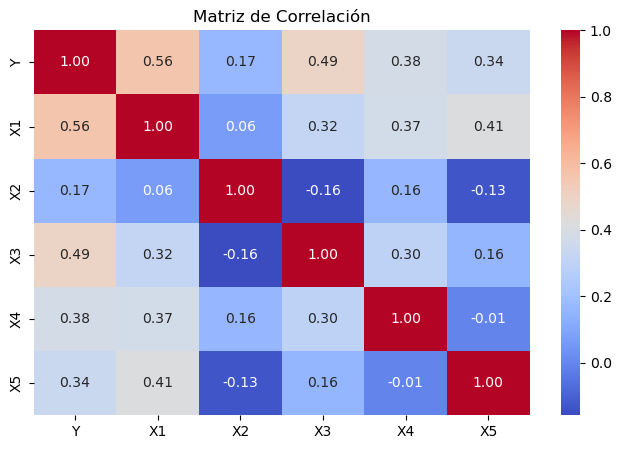

In [14]:
#Analicemos correlaciones para comprobar

# Matriz de correlación y heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

**Observaciones del gráfico:**

**Correlación con la variable dependiente (Y - Riesgo de infección):**

- **X1 (Duración de la estadía):** tiene una correlación de 0.56 con Y, lo que sugiere una relación moderada-positiva: a mayor tiempo de estadía, mayor riesgo de infección.

- **X3 (Número de camas):** tiene una correlación de 0.49, también positiva, lo que indica que hospitales más grandes tienden a tener un mayor riesgo de infección.

- **X4 (Censo promedio diario) y X5 (Número de enfermeras):** tienen correlaciones más bajas (0.38 y 0.34, respectivamente), lo que sugiere una relación positiva pero más débil con Y.

- **X2 (Rutina de cultivos):** tiene una correlación muy baja (0.17), lo que indica que su impacto en el riesgo de infección es más incierto.

**Correlaciones entre variables predictoras:**

- X1 y X5 tienen una correlación moderada de 0.41, lo que podría indicar que hospitales con mayor duración de estadía tienden a tener más enfermeras.

- X1 y X3/X4 muestran correlaciones moderadas (0.32 y 0.37), sugiriendo que hospitales con mayor duración de estadía también tienden a tener más camas y más pacientes por día.

- X2 (Rutina de cultivos) tiene una relación baja o negativa con las demás variables, lo que indica que su comportamiento es independiente.

**Multicolinealidad:**

No hay una correlación extremadamente alta (>0.8) entre variables predictoras, lo cual es bueno porque significa que no hay un problema grave de multicolinealidad.

In [16]:
#Análisis de muolticolinealidad con número de condición e índice de condición 

x = df[['X1', 'X2', 'X3',"X4","X5"]].values

# Agregar una columna de 1s para el intercepto
x = np.column_stack((np.ones(len(x)), x))

xtx = (x.T @ x)

autovalori = np.linalg.eig(xtx)
autovalori 

#Autovalores
eigenvalues = autovalori[0]
eigenvalor_max = np.max(eigenvalues)

resultados = []
for eigenvalor in eigenvalues:
  if eigenvalor != eigenvalor_max:
           resultado = np.sqrt(eigenvalor_max / eigenvalor)
           resultados.append(resultado)

# indices de condicion
indices_condicion = np.sqrt(resultados)
print("Indices de condición",indices_condicion)

Indices de condición [ 2.3728412   5.68883867  6.27758371 67.89818019 16.68213323]


**Análisis:**
- Solo hay un índice de condición que nos indica que puede existir algún problema de multicolinealidad severa ya que es > 31,6. Sin embargo, los demás se encuentran en valores no problemáticos.

**5.** Realice validación de los supuestos del modelo de regresión, explique y concluya.

In [135]:
# Obtener residuos y valores ajustados
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

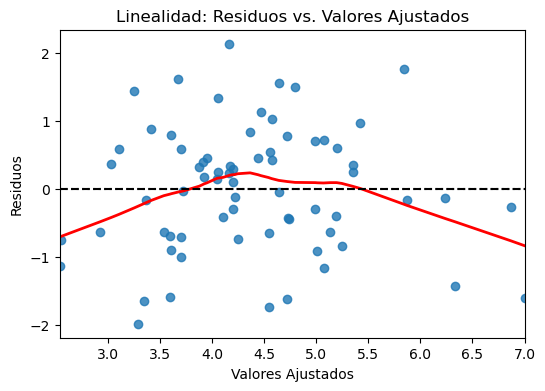

Hipótesis:
H0: La relación entre las variables independientes y la variable dependiente es lineal.
Ha: La relación entre las variables independientes y la variable dependiente no es lineal.


In [136]:
# Supuesto #1: LINEALIDAD
plt.figure(figsize=(6, 4))
sns.residplot(x=valores_ajustados, y=residuos, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Linealidad: Residuos vs. Valores Ajustados")
plt.show()

# Evaluación del supuesto
print("Hipótesis:")
print("H0: La relación entre las variables independientes y la variable dependiente es lineal.")
print("Ha: La relación entre las variables independientes y la variable dependiente no es lineal.")

**Interpretación**

**Nota:** El gráfico de residuos vs. valores ajustados nos ayuda a verificar si la relación entre las variables predictoras (X) y la variable respuesta (Y) es lineal.

- El supuesto de linealidad se cumple de forma aproximada, pero hay ligeras desviaciones que pueden indicar que algunos predictores podrían tener relaciones no lineales con la variable de respuesta.

**Observación:** 
- La curva roja muestra cierta variabilidad y patrones en los residuos, lo que indica que podría haber una relación no completamente lineal entre las variables.
- Como se observa un patrón en los residuos, hay evidencia para rechazar la hipótesis nula (H0) en favor de la hipótesis alternativa (Ha).

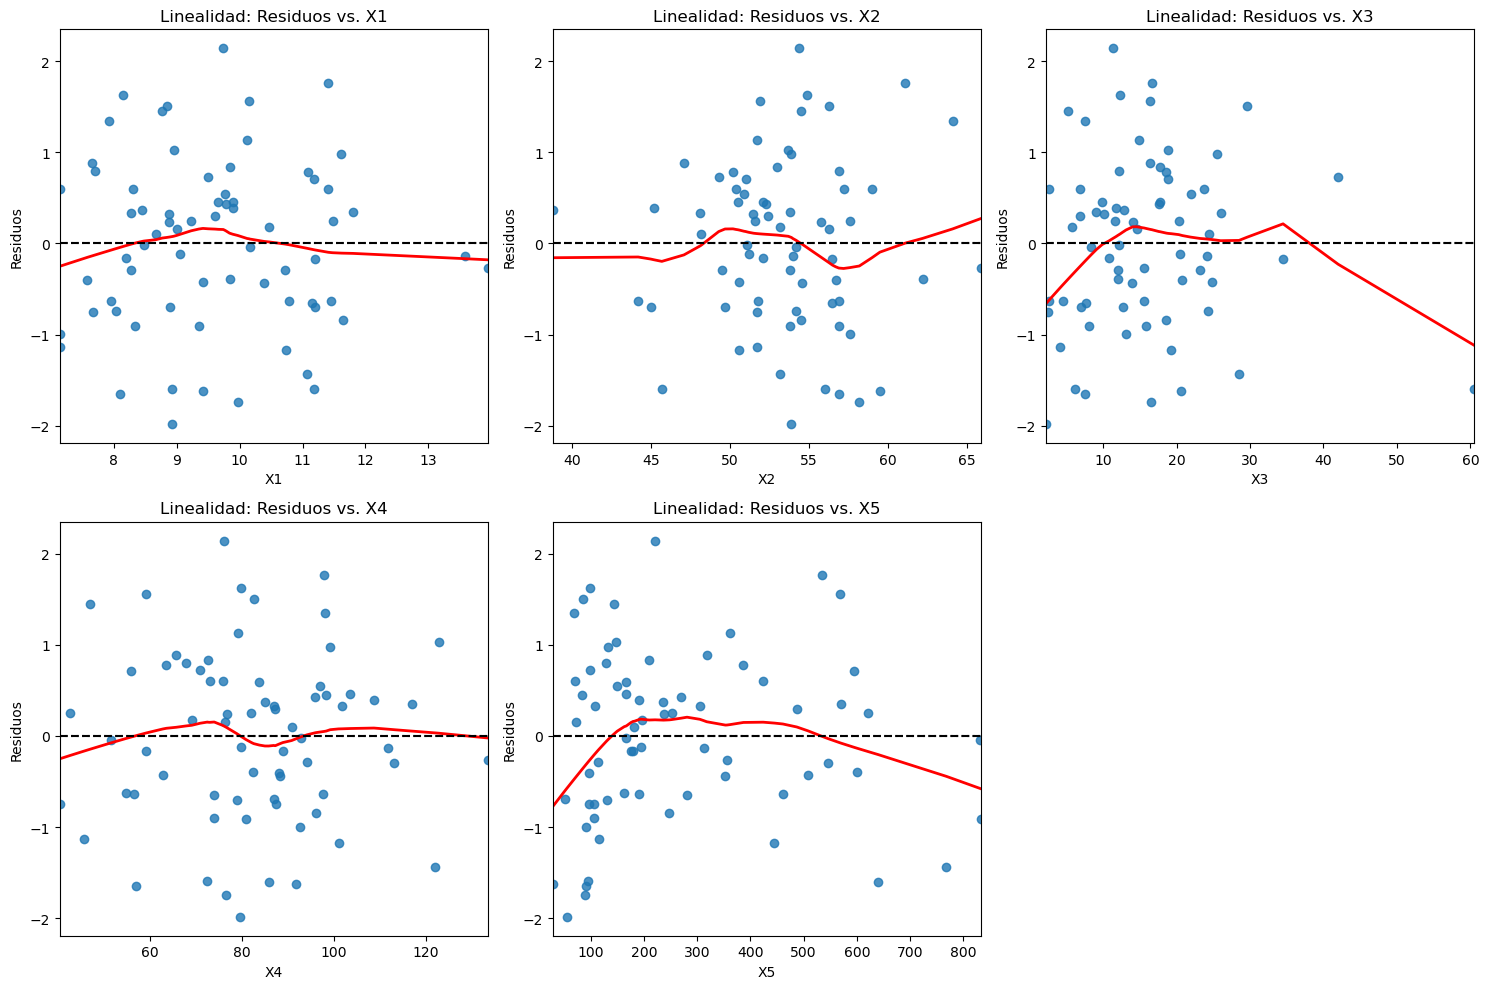

In [137]:
# 1.1: LINEALIDAD (Residuos vs. cada variable independiente)

# Variables independientes
X_vars = ["X1", "X2", "X3", "X4", "X5"]

# Número de variables
num_vars = len(X_vars)

# Determinar las filas y columnas óptimas
num_cols = 3  # Fijamos 3 columnas
num_rows = math.ceil(num_vars / num_cols)

# Crear la figura con la cantidad justa de subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurar que 'axes' sea un array unidimensional
axes = np.array(axes).flatten()

# Graficar los residuos para cada variable
for i, var in enumerate(X_vars):
    sns.residplot(x=df[var], y=residuos, lowess=True, line_kws={'color': 'red', 'lw': 2}, ax=axes[i])
    axes[i].axhline(y=0, color='black', linestyle='--')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Residuos")
    axes[i].set_title(f"Linealidad: Residuos vs. {var}")

# Eliminar cualquier subgráfico vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Análisis variable por variable:**

- **X1 (Duración de la estadía):** La dispersión parece bastante aleatoria, aunque hay una ligera curvatura en la línea roja. Conclusión: No hay una violación fuerte de linealidad. -> No se rechaza la hipótesis nula (H0), la relación parece ser lineal.

- **X2 (Rutina de cultivos):** La línea roja presenta oscilaciones leves, pero en general no hay un patrón curvo fuerte. Conclusión: La relación parece ser aproximadamente lineal, aunque hay ligeras variaciones. -> No se rechaza la hipótesis nula (H0), la relación parece ser lineal.

- **X3 (Número de camas):** Se observa una curvatura más evidente en la línea roja, lo que sugiere una posible relación no lineal. -> Se rechaza la hipótesis nula (H0), la relación no parece ser lineal.

- **X4 (Censo promedio diario):** La dispersión de los puntos es aleatoria y la línea roja se mantiene bastante estable. Conclusión: No hay problemas evidentes de linealidad. -> No se rechaza la hipótesis nula (H0), la relación parece ser lineal.

- **X5 (Número de enfermeras):** La línea roja presenta una curvatura pronunciada en los extremos. Conclusión: Puede haber una relación no lineal. -> Se rechaza la hipótesis nula (H0), la relación no parece ser lineal.

In [138]:
# Supuesto #2: INDEPENDENCIA DE LOS ERRORES (Durbin-Watson)
dw_stat = durbin_watson(residuos)
print(f"\nPrueba de Durbin-Watson (independencia de residuos): {dw_stat:.4f}")

# Hipótesis
print("Hipótesis de la prueba de Durbin-Watson:")
print("H0: No hay correlación entre los errores (los residuos son independientes).")
print("Ha: Existe correlación entre los errores (los residuos no son independientes).")

# Definir los umbrales de decisión
if 1.5 <= dw_stat <= 2.5:
    conclusion = "No se rechaza la hipótesis nula (los errores son independientes)."
elif dw_stat < 1.5:
    conclusion = "Se rechaza la hipótesis nula en favor de la alternativa (existe autocorrelación positiva)."
else:  # dw_stat > 2.5
    conclusion = "Se rechaza la hipótesis nula en favor de la alternativa (existe autocorrelación negativa)."

print(conclusion)


Prueba de Durbin-Watson (independencia de residuos): 1.9611
Hipótesis de la prueba de Durbin-Watson:
H0: No hay correlación entre los errores (los residuos son independientes).
Ha: Existe correlación entre los errores (los residuos no son independientes).
No se rechaza la hipótesis nula (los errores son independientes).


**Interpretación:** Como el valor está muy cerca de 2, no hay evidencia de autocorrelación significativa en los residuos.
**Conclusión:** La independencia de los residuos se cumple, lo que es un buen indicio para la validez del modelo. 

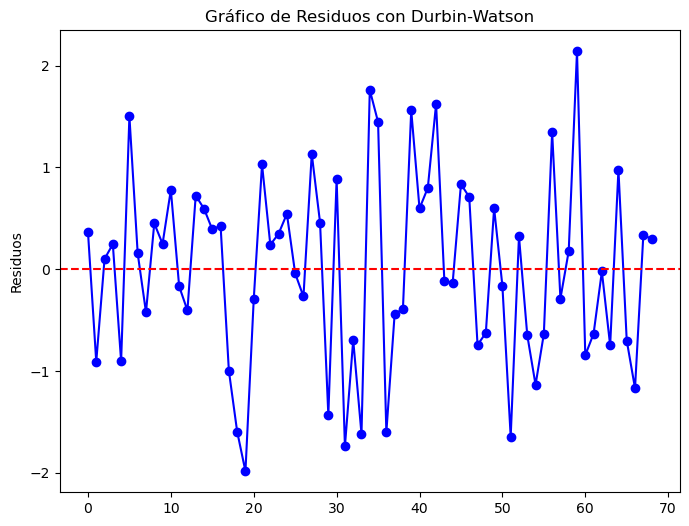

In [17]:
# Crear un gráfico de la aleatoriedad con Durbin-Watson
plt.figure(figsize=(8, 6))
plt.plot(modelo.resid, marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos con Durbin-Watson')
#plt.xlabel('Tiempo (Observaciones)')
plt.ylabel('Residuos')
plt.show()

Hipótesis de la normalidad de los errores:
H0: Los residuos siguen una distribución normal.
Ha: Los residuos no siguen una distribución normal.
Shapiro-Wilk test: Estadístico=0.9884, p-valor=0.7757


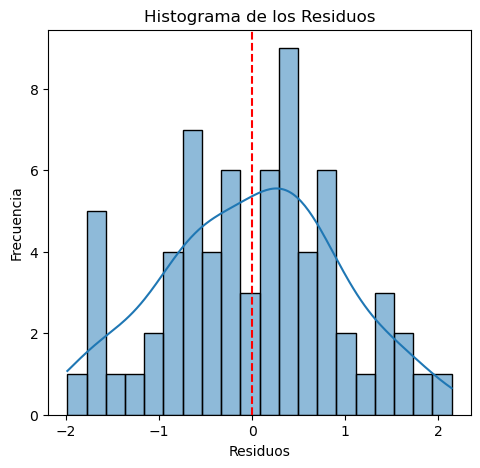

In [139]:
# Supuesto #3: NORMALIDAD DE LOS ERRORES
plt.figure(figsize=(12, 5))

# Histograma de residuos
plt.subplot(1, 2, 1)
sns.histplot(residuos, bins=20, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de los Residuos")

# Imprimir las hipótesis
print("Hipótesis de la normalidad de los errores:")
print("H0: Los residuos siguen una distribución normal.")
print("Ha: Los residuos no siguen una distribución normal.")

# 3.1 Prueba de normalidad de Shapiro-Wilk
stat, p = stats.shapiro(residuos)
print(f"Shapiro-Wilk test: Estadístico={stat:.4f}, p-valor={p:.4f}")

**Observaciones del histograma:**
- **Forma:** Aunque los residuos parecen tener una distribución aproximadamente simétrica, la curva de densidad sugiere que hay cierta irregularidad.
- **Picos y dispersión:** Se observan varias agrupaciones de datos (picos) que podrían indicar desviaciones de la normalidad.
- **Presencia de cola:** Parece haber cierta asimetría, lo que sugiere que la distribución no es perfectamente normal.

**Conclusión preliminar:** A simple vista, parece que los residuos no siguen una distribución normal de manera estricta, pero la evaluación visual no es suficiente.

**Aplicamos Prueba de normalidad de Shapiro-Wilk**
- Como el p-valor (0.7757) es mayor a 0.05, NO hay suficiente evidencia para rechazar H0. Es decir, los residuos siguen una distribución normal según esta prueba.

<Figure size 600x600 with 0 Axes>

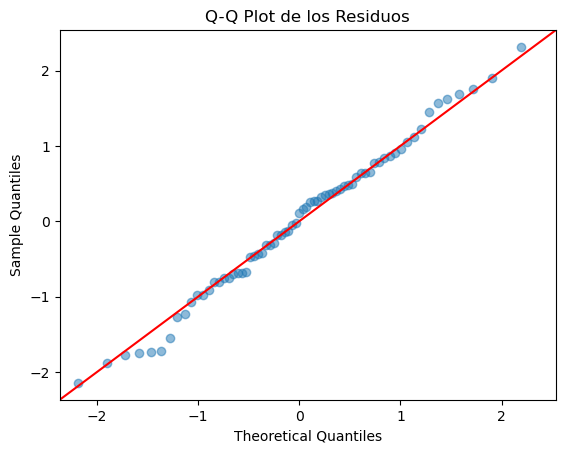

In [140]:
# 3.2 Hacemos Q-Q Plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuos, line='45', fit=True, alpha=0.5)  
plt.title("Q-Q Plot de los Residuos") 
plt.show()

**Análisis del gráfico**
- **Alineación central buena:** En la parte central del gráfico, los puntos siguen bastante bien la línea roja, lo que indica que la mayoría de los residuos tienen una distribución normal.
- **Colas levemente desviadas:** En los extremos (cuantiles más bajos y más altos), los puntos se desvían un poco de la línea roja. Esto sugiere que hay ligeros problemas de normalidad en las colas (posible presencia de valores atípicos o distribución ligeramente sesgada).

**Conclusión:** En general, la normalidad de los residuos parece aceptable. Sin embargo, la desviación en las colas podría indicar la presencia de valores atípicos o una distribución con colas más pesadas que la normal.

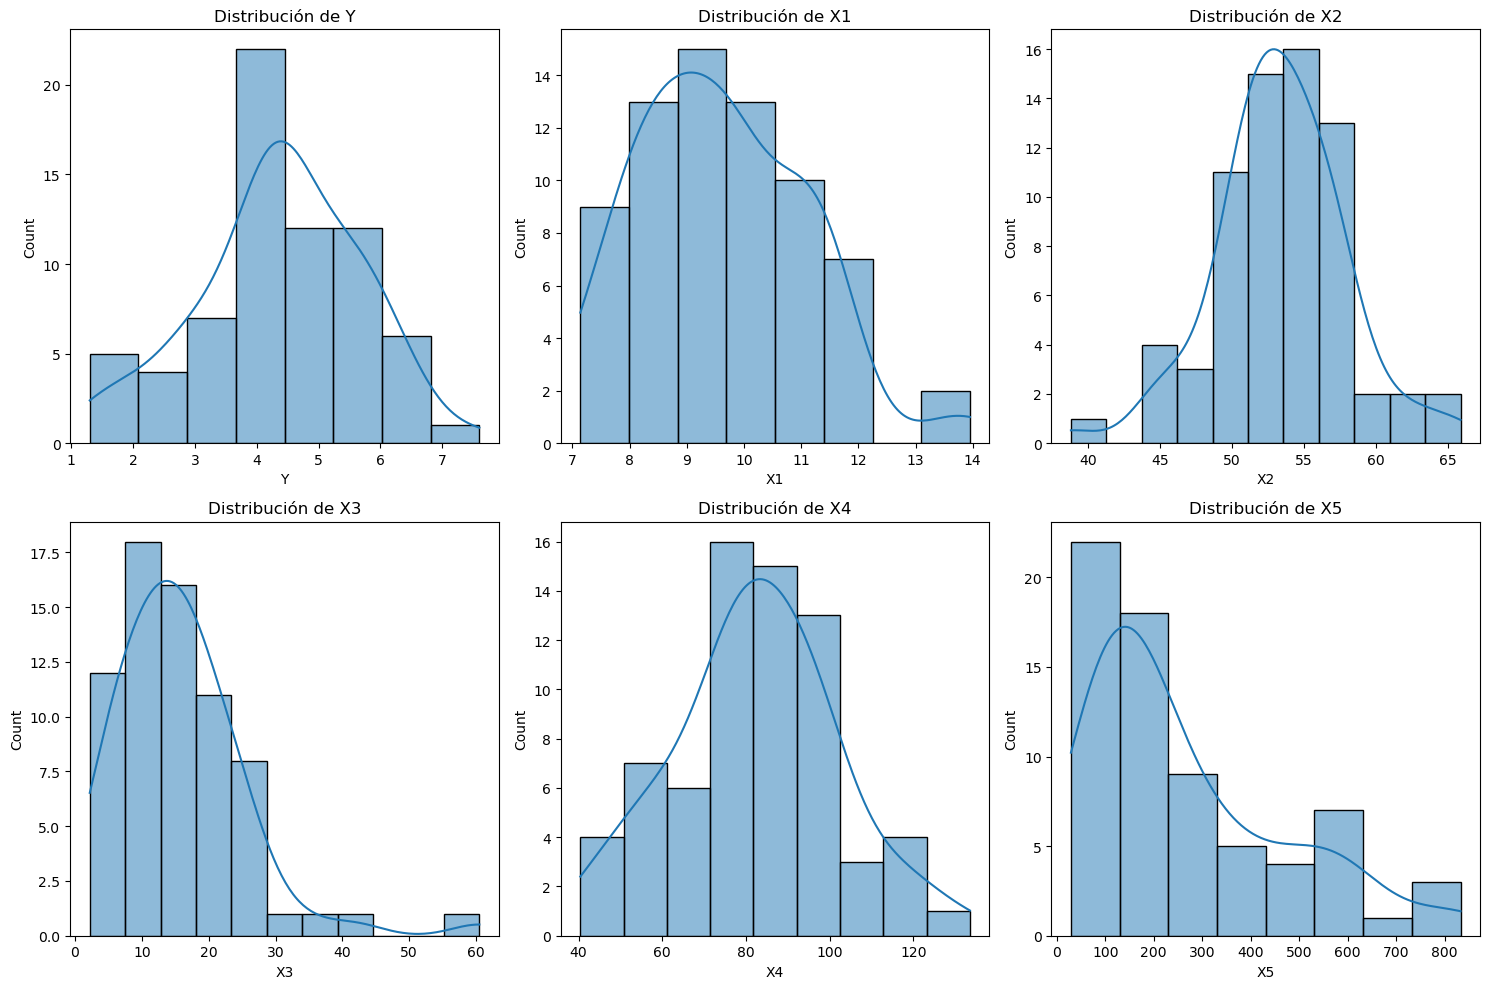

In [141]:
# Como punto extra queremos analizar la normalidad de las diferentes variables.
# Histogramas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

**Análisis de los histogramas por variables:**

- **Y (Riesgo de infección):** Tiene una distribución asimétrica a la derecha, con una ligera concentración de valores entre 3 y 5. Hay algunos valores más altos (>6), lo que indica la posible presencia de valores atípicos.

- **X1 (Duración de la estadía):** Parece seguir una distribución aproximadamente normal, aunque con una leve asimetría a la derecha. Se concentra entre 8 y 10 días, lo cual sugiere que la mayoría de los pacientes tienen estancias similares.

- **X2 (Rutina de cultivos):** También muestra una distribución normal, con valores centrados en 50-55 cultivos por cada 100 pacientes. No parece haber valores extremos evidentes.

- **X3 (Número de camas):** Se distribuye de manera sesgada a la derecha, lo que indica que la mayoría de los hospitales tienen menos camas, con unos pocos hospitales mucho más grandes.

- **X4 (Censo promedio diario):** Tiene una forma similar a la normal, aunque ligeramente desplazada a la derecha. Se observa que la mayoría de los hospitales tienen un censo promedio entre 60 y 100 pacientes diarios.

- **X5 (Número de enfermeras):** Presenta una distribución altamente sesgada a la derecha, indicando que la mayoría de los hospitales tienen pocas enfermeras, pero hay algunos con muchas más. Posible presencia de valores atípicos en hospitales con más de 500 enfermeras.

**Entonces:**
- X1 y X2 parecen seguir distribuciones normales, lo que es favorable para el modelo de regresión.
- X3, X4 y X5 están sesgadas a la derecha, lo que podría afectar la regresión. Podría considerarse una transformación (logarítmica o raíz cuadrada) si afectan la linealidad.
- Y también está ligeramente sesgada, lo que podría indicar que el modelo no tendrá una distribución normal de los residuos.

hipotesis_nula = H0: La varianza de los residuos es constante (homocedasticidad)
hipotesis_alternativa = Ha: La varianza de los residuos no es constante (heterocedasticidad)


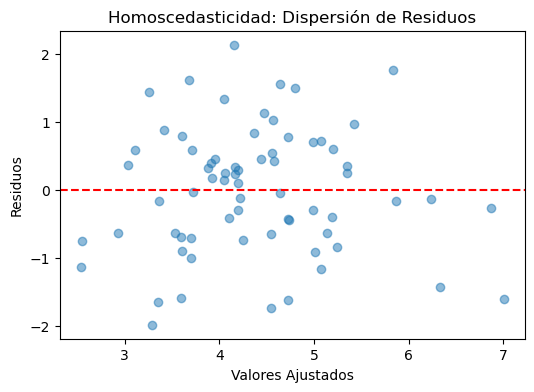

In [142]:
# Supuesto #4: HOMOSCEDASTICIDAD
plt.figure(figsize=(6, 4))
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Homoscedasticidad: Dispersión de Residuos")

#  Hipótesis
print("hipotesis_nula = H0: La varianza de los residuos es constante (homocedasticidad)")
print("hipotesis_alternativa = Ha: La varianza de los residuos no es constante (heterocedasticidad)")

plt.show()

**Análisis del gráfico:**
- **Distribución de los residuos:** Los puntos parecen estar dispersos aleatoriamente alrededor de la línea roja (que representa el valor cero), sin un patrón evidente de aumento o disminución en la dispersión a medida que los valores ajustados aumentan.
- **Varianza constante:** La dispersión de los residuos parece relativamente uniforme a lo largo de todo el rango de valores ajustados, lo que sugiere que no hay problemas graves de heterocedasticidad.
- **Ausencia de patrones evidentes:** No se observa una forma de abanico (indicativa de heterocedasticidad), ni agrupaciones que sugieran una relación no lineal entre los residuos y los valores ajustados.

**Conclusión:** Basado en la apariencia del gráfico, no hay evidencia clara de heterocedasticidad, por lo que se podría concluir que el supuesto de homocedasticidad se cumple razonablemente.

In [143]:
# 4.1 Revisamos HOMOSCEDASTICIDAD con prueba de White.

# Nota: Esta prueba se realiza estimando una regresión auxiliar donde los residuos al cuadrado se modelan en función de los valores ajustados y sus 
# cuadrados. Luego, se usa la estadística de contraste de heterocedasticidad de White basada en la distribución χ² (chi-cuadrado).

# Calcular los residuos al cuadrado
residuos_cuadrados = residuos ** 2

# Crear variables auxiliares (valores ajustados y su cuadrado)
X_aux = np.column_stack((valores_ajustados, valores_ajustados**2))
X_aux = sm.add_constant(X_aux)  # Agregar constante

# Regresión auxiliar: residuos² ~ valores ajustados + valores ajustados²
modelo_aux = sm.OLS(residuos_cuadrados, X_aux).fit()

# Obtener el estadístico de la prueba de White
white_test = smd.het_white(modelo_aux.resid, X_aux)

# Extraer valores de la prueba
estadistico, p_valor = white_test[0], white_test[1]

print(f"Estadístico de prueba de White: {estadistico:.4f}")
print(f"p-valor: {p_valor:.4f}")

# Interpretación
alpha = 0.05
if p_valor < alpha:
    print("Rechazamos la hipótesis nula: Hay evidencia de heterocedasticidad.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente de heterocedasticidad.")

Estadístico de prueba de White: 1.3296
p-valor: 0.8563
No se rechaza la hipótesis nula: No hay evidencia suficiente de heterocedasticidad.


**6.** Tome un punto dentro del rango de observaciones, verifique que lo sea. Realice una predicción con este punto,
utilizando el modelo completo, interprete.

In [23]:
# Agregar una columna de unos para el término independiente (intercepto)
# Verificar si la columna "Intercepto" ya existe
if "Intercepto" not in df.columns:
    df.insert(1, "Intercepto", 1)

# Separar la variable dependiente (Y) y la matriz de diseño (X)
Y = df["Y"].values
X = df.drop(columns=["Y"]).values

# Calcular X'X
XtX = np.dot(X.T, X)

# Calcular la inversa de X'X
XtX_inv = np.linalg.inv(XtX)

# Calcular la matriz hat H
H = np.dot(np.dot(X, XtX_inv), X.T)

# Extraer los valores diagonales (leverage)
hat_values = np.diag(H)

# Mostrar la matriz hat y los primeros valores de leverage
print("Matriz Hat (H):")
print(H)
print("\nPrimeros valores de leverage:")
print(hat_values[:10])

# Verificar que el punto está dentro del rango de observaciones
min_values = X.min(axis=0)  # Valores mínimos por columna
max_values = X.max(axis=0)  # Valores máximos por columna

Matriz Hat (H):
[[ 0.19622731  0.0004659   0.07524903 ...  0.04806643  0.08755508
   0.03952617]
 [ 0.0004659   0.16908152  0.00347708 ...  0.04224888 -0.00404853
   0.07279107]
 [ 0.07524903  0.00347708  0.0597971  ...  0.02405744  0.07352389
   0.00393588]
 ...
 [ 0.04806643  0.04224888  0.02405744 ...  0.04612537  0.02791813
   0.03552336]
 [ 0.08755508 -0.00404853  0.07352389 ...  0.02791813  0.09643504
   0.00221953]
 [ 0.03952617  0.07279107  0.00393588 ...  0.03552336  0.00221953
   0.05890219]]

Primeros valores de leverage:
[0.19622731 0.16908152 0.0597971  0.1200153  0.04040443 0.0852836
 0.03552736 0.07176627 0.05283875 0.06428509]


In [19]:
# Matriz con el método de stats model

hat_metodo = modelo.get_influence().hat_matrix_diag
print(hat_metodo)
mx = hat_metodo.max()
print("Número mayor de la diagonal de matriz Hat",mx)

[0.19622731 0.16908152 0.0597971  0.1200153  0.04040443 0.0852836
 0.03552736 0.07176627 0.05283875 0.06428509 0.06441555 0.1074636
 0.0771465  0.18380808 0.04506001 0.131265   0.0235479  0.09052754
 0.04016715 0.05616175 0.18820936 0.10269168 0.02420392 0.13383593
 0.03798536 0.17861729 0.27471496 0.02118916 0.04729123 0.18177881
 0.07315449 0.05414082 0.04889387 0.06779936 0.09858419 0.07726623
 0.38077413 0.02272256 0.13553545 0.06809247 0.0896672  0.05458926
 0.03383506 0.02598812 0.13831609 0.02543466 0.09776886 0.06368719
 0.05751386 0.06108352 0.0407407  0.06384808 0.03385575 0.06602131
 0.08708915 0.05784321 0.13706858 0.04824701 0.06147416 0.02150506
 0.05073368 0.16819021 0.04263527 0.09863668 0.07444197 0.16605171
 0.04612537 0.09643504 0.05890219]
Número mayor de la diagonal de matriz Hat 0.3807741307826355


**Nota:** El número anterior se establece como el umbral para determinar si una observación es extrapolación o interpolación.
hoo > hmax ese xo es un punto de extrapolacion
hoo < hmax ese xo es un punto de interpolacion

In [150]:
# Ahora elijamos nosotros un punto para hacer la predicción, para esto debemos analizar el rango

# Mostrar los valores mínimos y máximos de cada variable
min_values = X.min(axis=0)
max_values = X.max(axis=0)

# Imprimir los rangos para referencia
print("Valores mínimos:", min_values)
print("Valores máximos:", max_values)

Valores mínimos: [ 1.    7.14 38.8   2.2  40.4  29.  ]
Valores máximos: [  1.    13.95  65.9   60.5  133.5  833.  ]


In [25]:
# Crear un array de los números generados
X0 = np.array([1, 10.29, 55.73, 39.64, 70.48, 472.65])

# matriz hat
hoo = (X0) @ np.linalg.inv(xtx) @ (X0)
print("hoo: ", hoo)

hoo:  0.1667695354949651


**Conclusión:** Como hoo es un valor menor a 0.3807741307826355 entonces obtenemos un punto de interpolación. Esto implica que podemos hacer una predicción con este punto.

In [26]:
#Predicción
X0 = np.array([1, 10.29, 55.73, 39.64, 70.48, 472.65])  
X0 = X0.reshape(1, -1)

# Hacer la predicción
y_pred = modelo.predict(X0)

print("Predicción:", y_pred)

Predicción: [6.01337731]


**Interpretación:** Para los valores de X0, la respuesta media de Y es igual a 6.0133773. Es decir, la probabilidad promedio  de Riesgo de infección es aproximadamente del 6%.